# Compare results from different ROCKET methods
1. ROCKET
2. miniROCKET
3. multiROCKET

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sktime.classification.kernel_based import RocketClassifier

from datasets import Dataset
from param import *

datalist = ParamDir().data_path_list

data_dir = datalist[2] # a wild-type mouse
dataset = Dataset(data_dir, 1.0, False)

(X_train, y_train), (X_test, y_test) = dataset.load_all_data(10, .8)

## Multivariate Rocket

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

rocket = RocketClassifier(
    rocket_transform="rocket",
    use_multivariate="yes"
    )
param_grid = {"num_kernels": [200*i for i in range(1, 20)]}
parameter_tuning_method = GridSearchCV(rocket, param_grid, cv=KFold(n_splits=5))
parameter_tuning_method.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RocketClassifier(use_multivariate='yes'),
             param_grid={'num_kernels': [200, 400, 600, 800, 1000, 1200, 1400,
                                         1600, 1800, 2000, 2200, 2400, 2600,
                                         2800, 3000, 3200, 3400, 3600, 3800]})

In [11]:
parameter_tuning_method.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_num_kernels', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

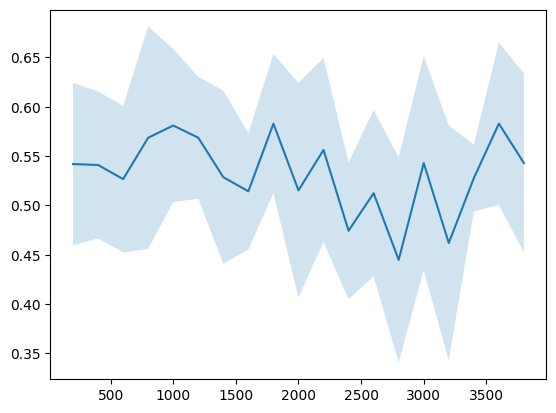

In [21]:
fig, ax = plt.subplots()
results = parameter_tuning_method.cv_results_
xx = [i['num_kernels'] for i in results['params']]
mean_score = results['mean_test_score']
std_score = results['std_test_score']
ax.plot(xx, mean_score)
ax.fill_between(xx, mean_score-std_score, mean_score+std_score, alpha=0.2)

In [14]:
[i['num_kernels'] for i in results['params']]

[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]

In [4]:
y_pred = parameter_tuning_method.predict(X_test)
np.sum(y_test == y_pred)/len(y_test)

0.5384615384615384

## Multivarate miniROCKET

In [5]:
rocket = RocketClassifier(
    num_kernels=2000,
    rocket_transform="minirocket",
    use_multivariate="yes"
    )
rocket.fit(X_train, y_train)
y_pred = rocket.predict(X_test)

In [6]:
np.sum(y_test == y_pred)/len(y_test)

0.46153846153846156

## Multivarate multiROCKET

In [7]:
rocket = RocketClassifier(
    num_kernels=2000,
    rocket_transform="multirocket",
    use_multivariate="yes"
    )
rocket.fit(X_train, y_train)
y_pred = rocket.predict(X_test)

In [8]:
np.sum(y_test == y_pred)/len(y_test)

0.46153846153846156